In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
boston = pd.read_csv("boston.csv")

In [3]:
print("------------Dataframe Info------------------")
print(boston.info())
print("\n")

------------Dataframe Info------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  BLACK    506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None




In [4]:
print("----------Dataframe Describe------------")
print(boston.describe())
print("\n")

----------Dataframe Describe------------
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO       BLACK  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  

In [5]:
print("-----------Dataframe 5 Rows---------------")
print(boston.head())
print("\n")

-----------Dataframe 5 Rows---------------
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO   BLACK  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  




In [6]:
print("-----------Dataframe Columns List----------------")
print(boston.columns)
print("\n")

-----------Dataframe Columns List----------------
Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'BLACK', 'LSTAT', 'MEDV'],
      dtype='object')




Selecting relevant features and target variable


In [7]:
X = boston[['RM', 'LSTAT', 'PTRATIO']]
y = boston['MEDV']

In [20]:
print("-------------Splitting data into training and test sets-------------------")
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("\n")

-------------Splitting data into training and test sets-------------------
X_train shape: (404, 3)
X_test shape: (102, 3)
y_train shape: (404,)
y_test shape: (102,)




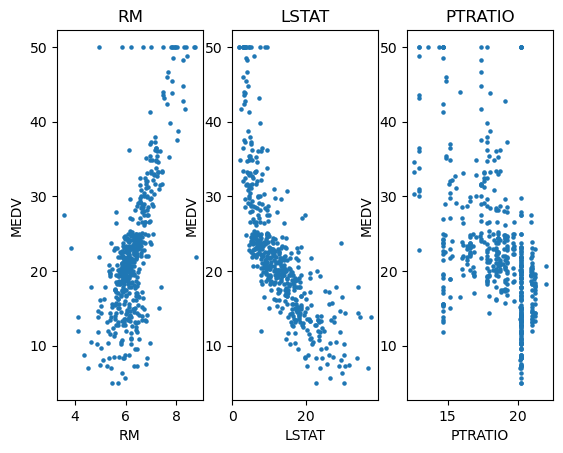

In [21]:
for i, feature in enumerate(X.columns):
    plt.subplot(1, 3, i + 1)
    plt.scatter(X[feature], y, marker='o', s=5)
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('MEDV')

In [22]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

Creating a linear regression model<br>
Training the model<br>
Making predictions


In [23]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

-------------Visualization after fitting model---------------


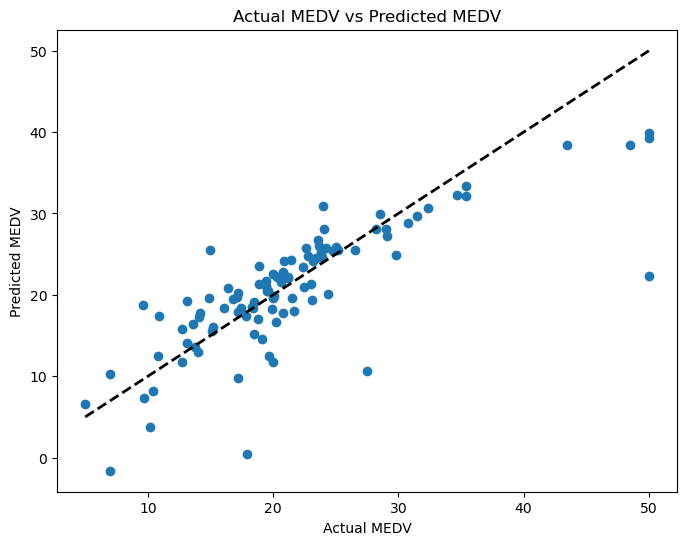

In [25]:
print("-------------Visualization after fitting model---------------")
# Visualization after fitting the model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.title('Actual MEDV vs Predicted MEDV')
plt.show()
print("\n")

Evaluating the model


In [26]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("-----------Evaluation Result----------------")
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
print('\n')

-----------Evaluation Result----------------
Mean Squared Error: 27.114957415580573
R^2 Score: 0.6302528487272828


